# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: Sentinels

YOUR-ID: 2019101054 2019111002

YOUR-NAME: Vedansh Mittal Bhaskar Joshi

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from copy import deepcopy as dcopy
import open3d as o3d
from scipy.spatial.kdtree import KDTree 

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [ ]:
#Initial Parameters

actual_amp=10
actual_mean=0
actual_sd=20

no_of_obs=50

initial_amp,initia_mean,initial_sd=10,13,19.12

In [ ]:
from helpers.func import make_gaussian

#generating data
x_obs = np.linspace(-25, 25, no_of_obs)
y_obs = make_gaussian(x_obs, actual_amp, actual_mean, actual_sd)

def show_init_state():
    y_est = make_gaussian(x_obs, initial_amp, initia_mean, initial_sd)
    plt.plot(x_obs,y_obs)
    plt.plot(x_obs,y_est)
    plt.xlabel("X"),plt.ylabel("Y")
    plt.legend(["Ground Truth","Initial Guess"])
    plt.title("Initial Guess Plot")
    plt.show()

In [ ]:
#defining partial derivatives
def y_wrt_a(x,a,m,s):
    return (1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(x-m)**2/(2*s**2))

def y_wrt_m(x,a,m,s):
    return  (1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(x-m)**2/(2*s**2))*(a)*(x-m)/(s**2)

def y_wrt_s(x,a,m,s):
    return  (1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(x-m)**2/(2*s**2))*(a)*(-1/s ) +(1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(x-m)**2/(2*s**2))*(a)*((x-m)**2)/(s**3) 


In [ ]:
def residual(x,a,m,s,y):
    return make_gaussian(x,a,m,s)-y
    
def jacobian(x,a,m,s):
    return np.c_[y_wrt_a(x,a,m,s),y_wrt_m(x,a,m,s),y_wrt_s(x,a,m,s)]


gd_learning_rate = 10
no_of_itr = 1000
tolerance = 1e-10

def gradient_descent(x_obs, y_obs, a, m, s, no_of_itr=no_of_itr, alpha=gd_learning_rate, tolerance=tolerance):
    W = [a, m, s]
    Rs = []
    for _ in range(int(no_of_itr)):
        # jac=np.c_[y_wrt_a(x_obs,a,m,s),y_wrt_m(x_obs,a,m,s),y_wrt_s(x_obs,a,m,s)]
        jac = jacobian(x_obs, W[0], W[1], W[2])
        resi = residual(x_obs, W[0], W[1], W[2], y_obs)
        W = W - alpha * jac.T @ resi
        R = np.sqrt((resi**2).sum() / no_of_obs)
        Rs.append(R)
        if R < tolerance:
            break
    return W,Rs


In [ ]:
def plot_resultant_graph(x_obs, y_obs, W):
    y_est = make_gaussian(x_obs, W[0], W[1], W[2])
    plt.clf()
    plt.plot(x_obs,y_obs)
    plt.plot(x_obs,y_est)
    plt.xlabel("X"),plt.ylabel("Y")
    plt.legend(["Ground Truth","Predicted"])
    plt.title("Final Prediction")
    plt.show()

In [ ]:
def vary_itr(fn, itr_list):
    Rs = []
    plt.clf()
    plt.title("Varying iterations")
    plt.scatter(x_obs, y_obs, color='black', label="Ground truth")
    legnd = []
    plt.xlabel("X"), plt.ylabel("Y")
    print("Varying iterations, learning rate= ",
        gd_learning_rate, ", tolerance=", tolerance)

    for i,itr in enumerate(itr_list):
        W, Rs = fn(x_obs, y_obs, initial_amp, initia_mean, initial_sd, itr)

        y_est = make_gaussian(x_obs, W[0], W[1], W[2])
        plt.plot(x_obs, y_est, label=str(itr))
        legnd.append(str(itr))

    plt.legend()
    plt.show()
    plt.clf()
    plt.plot(Rs)
    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.title("error vs iterations")
    plt.legend(legnd)
    plt.show()


In [ ]:
def vary_lr(fn, learning_rates_list):
    errors = []
    plt.clf()
    plt.scatter(x_obs,y_obs, color='black', label="Ground truth")
    legnd = []
    plt.xlabel("X"),plt.ylabel("Y")
    plt.title("Varying learning rate")
    print("Varying learning rate")

    for i,lr in enumerate(learning_rates_list):
        W, R = fn(x_obs, y_obs, initial_amp,
                                initia_mean, initial_sd, no_of_itr, lr, tolerance)
        errors.append(R)

        y_est = make_gaussian(x_obs, W[0], W[1], W[2])
        plt.plot(x_obs,y_est, label=str(lr))
        legnd.append(str(lr))

    plt.legend()
    plt.show()
    plt.clf()
    for err in errors:
        plt.plot(err)
    
    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.title("Varying learning rate")
    plt.legend(legnd)
    plt.show()



In [ ]:
# varying tolerance

def vary_tol(fn, tol_list):
    errors=[]
    plt.clf()
    plt.scatter(x_obs, y_obs, color='black', label="Ground truth")
    legnd = []
    plt.xlabel("X"), plt.ylabel("Y")
    plt.title("Varying learning tolerance")
    print("Varying learning tolerance")
    max_iter = 1000

    print("Varying tolerance, learning rate= ",
        gd_learning_rate, ", max_iterations= ", max_iter)

    for i,tol in enumerate(tol_list):
        W, R = fn(x_obs, y_obs, initial_amp, initia_mean, initial_sd,
                                max_iter, gd_learning_rate, tol)
        errors.append(R)
        y_est = make_gaussian(x_obs, W[0], W[1], W[2])
        plt.plot(x_obs, y_est, label=str(tol))
        legnd.append(str(tol))

    plt.legend()
    plt.show()
    plt.clf()
    for err in errors:
        plt.plot(err)

    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.title("Varying learning tolerance")
    plt.legend(legnd)
    plt.show()


In [ ]:
def simulate(fn, lr_list=None, itr_list=None, tol_list=None):
    show_init_state()
    W, R = fn(x_obs, y_obs, initial_amp, initia_mean, initial_sd)
    plot_resultant_graph(x_obs, y_obs, W)
    if itr_list is not None:
        vary_itr(fn, itr_list)
    if lr_list is not None:
        vary_lr(fn, lr_list)
    if tol_list is not None:
        vary_tol(fn, tol_list)

In [ ]:
simulate(fn=gradient_descent,
         lr_list=np.geomspace(1e-4, 1500, 5).round(5),
         itr_list=np.linspace(100, 1300, 5),
         tol_list=np.geomspace(1e-15, 3e-2, 5)
         )


## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [ ]:
# from helpers.func import make_non_linear

def make_non_linear(x, p1, p2, p3, p4):
    y = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4)
    return y

nonl_learning_rate = 1e-5
no_of_itr2 = 15000
tolerance2 = 1e-15

no_of_obs = 50
p1, p2, p3, p4 = 2, 8 ,4, 8
init_p1, init_p2, init_p3, init_p4 = 3, 6, 5, 7.5  # taken randomly


In [ ]:
#defining partial derivatives
 
def y_wrt_p1(x,p1,p2,p3,p4):
    return  np.exp(-1*x / p2) 

def y_wrt_p2(x,p1,p2,p3,p4):
    return p1 * np.exp(-1*x / p2) * x * (1/(p2**2))

def y_wrt_p3(x,p1,p2,p3,p4):
    return  np.sin(x / p4)

def y_wrt_p4(x,p1,p2,p3,p4):
    return p3 * np.cos(x / p4) * (-1/(p4**2))*x


In [ ]:
def residual2(x,p1,p2,p3,p4,y):
    return make_non_linear(x,p1,p2,p3,p4)-y

def jacobian2(x,p1,p2,p3,p4):
    return np.c_[y_wrt_p1(x,p1,p2,p3,p4),y_wrt_p2(x,p1,p2,p3,p4),y_wrt_p3(x,p1,p2,p3,p4),y_wrt_p4(x,p1,p2,p3,p4)]


def gradient_descent2(x_obs, y_obs, p1, p2, p3, p4, no_of_itr=no_of_itr2, alpha=nonl_learning_rate, tolerance=tolerance2):
    W = [p1, p2, p3, p4]
    Rs = []
    for _ in range(int(no_of_itr)):
        jac = jacobian2(x_obs, W[0], W[1], W[2], W[3])
        resi = residual2(x_obs, W[0], W[1], W[2], W[3], y_obs)
        W = W - alpha * jac.T @ resi
        R = np.sqrt((resi**2).sum())/no_of_obs
        Rs.append(R)

        if R < tolerance:
            break
        
    return W,Rs
    

In [ ]:
def simulate_q1_2():
    x_obs = np.linspace(-20, 30, no_of_obs)
    y_obs = make_non_linear(x_obs, p1, p2, p3, p4)

    def plot_init_state():
        y_est = make_non_linear(x_obs, init_p1, init_p2, init_p3, init_p4)
        plt.plot(x_obs, y_obs)
        plt.plot(x_obs, y_est)
        plt.xlabel("X"), plt.ylabel("Y")
        plt.legend(["Ground Truth", "Initial Guess"])
        plt.title("Initial Guess")
        plt.show()

    plot_init_state()
    W, Rs = gradient_descent2(x_obs, y_obs, init_p1, init_p2, init_p3, init_p4)
    y_est = make_non_linear(x_obs, W[0], W[1], W[2], W[3])

    plt.clf()
    plt.plot(x_obs, y_obs)
    plt.plot(x_obs, y_est)
    plt.xlabel("X"), plt.ylabel("Y")
    plt.legend(["Ground Truth", "Predicted"])
    plt.title("Final Prediction")
    plt.show()

    plt.clf()
    plt.plot(Rs)
    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.show()

simulate_q1_2()


## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

In [ ]:
x_obs = np.linspace(-25, 25, no_of_obs)
y_obs = make_gaussian(x_obs, actual_amp, actual_mean, actual_sd)

In [50]:
no_of_itr = 100

def gauss_newton(x_obs, y_obs, a, m, s, no_of_itr=no_of_itr, alpha=gd_learning_rate, tolerance=tolerance):
    W = [a, m, s]
    Rs = []
    for _ in range(int(no_of_itr)):
        j = jacobian(x_obs, W[0], W[1], W[2])
        resi = residual(x_obs, W[0], W[1], W[2], y_obs)
        W = W - np.linalg.pinv(j.T @ j) @ j.T @ resi
        R = np.sqrt((resi**2).sum() / no_of_obs)
        Rs.append(R)
        if R < tolerance:
            break

    return W, Rs


lmda = gd_learning_rate = 1e-2
no_of_itr = 10000
tolerance = 1e-6

def LM(x_obs, y_obs, a, m, s, no_of_itr=no_of_itr, alpha=lmda, tolerance=tolerance):
    W = [a, m, s]
    lmda = alpha
    prev_err =np.inf
    Rs = []
    for _ in range(int(no_of_itr)):
        j = jacobian(x_obs, W[0], W[1], W[2])
        resi = residual(x_obs, W[0], W[1], W[2], y_obs)
        W = W - np.linalg.pinv(j.T @ j + lmda * np.eye(j.shape[1])) @ j.T @ resi
        R = np.sqrt((resi**2).sum() / no_of_obs)
        Rs.append(R)

        err = np.linalg.norm(R)**2
        if err > prev_err:
            lmda = 2*lmda
        elif prev_err !=np.inf:
            lmda = lmda/3
        
        prev_err = err
        if R < tolerance:
            break
        

    return W, Rs



In [ ]:
simulate(gauss_newton,
         lr_list=None,
         itr_list=np.linspace(1, 9, 5).astype(int),
         tol_list=np.geomspace(1e-5, 3, 5))


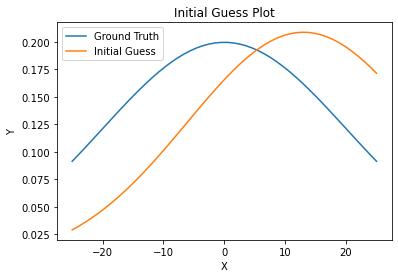

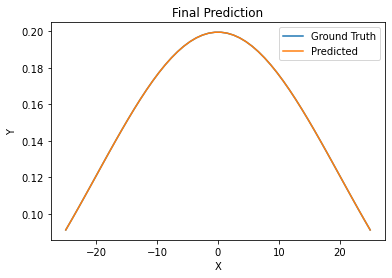

Varying iterations, learning rate=  0.01 , tolerance= 1e-06


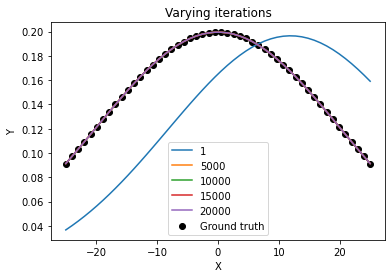

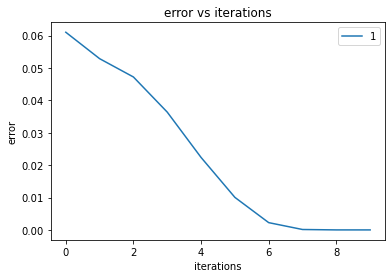

In [54]:
simulate(LM,
        #  lr_list=np.linspace(1e-4, 1, 5),
         itr_list=np.linspace(1, 2e4, 5).astype(int),
        #  tol_list=np.geomspace(1e-5, 3, 5)
        )

In [45]:
def vary_init(fn, init_list, name):
    plt.clf()
    plt.title(f"Varying initial state ({name})")
    plt.scatter(x_obs, y_obs, color='black', label="Ground truth")
    legnd = []
    errors = []

    for init in init_list:
        W, Rs = fn(x_obs, y_obs, init[0], init[1], init[2])
        plt.plot( x_obs, make_gaussian(x_obs, W[0], W[1], W[2]), label=str(init))
        legnd.append(str(init))
        errors.append(Rs)
    
    plt.legend()
    plt.show()
    plt.clf()
    plt.clf()
    for err in errors:
        plt.plot(err)

    plt.xlabel("iterations")
    plt.ylabel("error")
    plt.title(f"Varying initial state ({name})")
    plt.legend(legnd)
    plt.show()


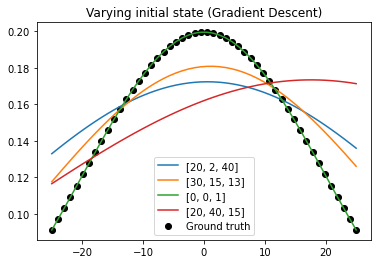

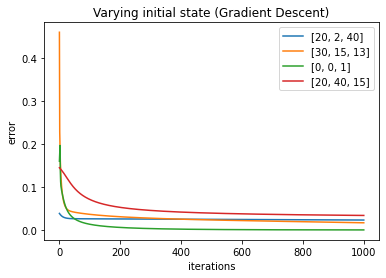

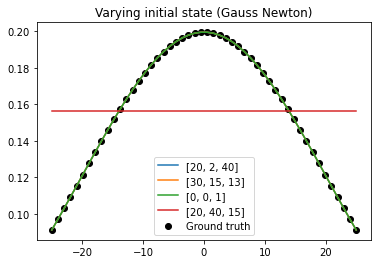

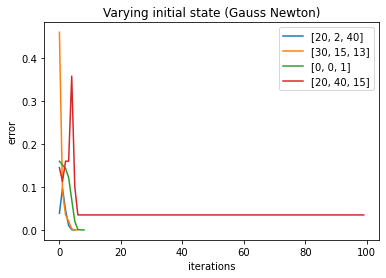

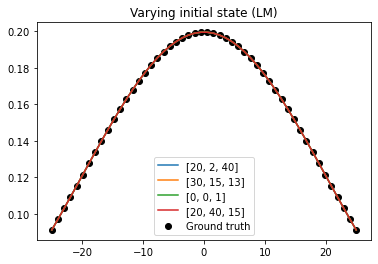

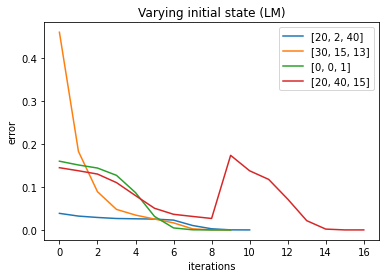

In [53]:
varies = [ 
    [20, 2, 40], 
    [30, 15, 13], 
    [0, 0, 1],
    [20, 40, 15]
]

vary_init(gradient_descent, varies,"Gradient Descent")
vary_init(gauss_newton, varies, "Gauss Newton")
vary_init(LM, varies, "LM")


**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

Answer 1. 


Answer 2.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


### Q4
Proof attaches in pdf named: Procustes_proof.pdf


In [ ]:
pcd = o3d.io.read_point_cloud("bunny.pcd")
np.random.seed(0)


def vizualize_points(points1, points2, T, text=""):
    def get_axis(origin=[0, 0, 0]):
        return o3d.geometry.TriangleMesh.create_coordinate_frame(0.05, origin)

    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(points1.T.copy())
    pcd1.paint_uniform_color((1, 0, 0))
    ax1 = get_axis()
    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(points2.T.copy())
    pcd2.paint_uniform_color((0, 0, 1))
    ax2 = dcopy(ax1).transform(T)

    o3d.visualization.draw_geometries([pcd1, pcd2, ax1, ax2], window_name=text)


def transform(P, T):
    R = T[:3, :3]
    t = T[:3, 3:]
    return R@P + t


In [ ]:
def solve_orth_procrustes(Q, P, send_rt=False):
    '''
    Q and P of shape (3,*)  
    results converts coord from P to Q  '''
    # R = V @ C @ U.T
    # t = Q_mean -  R @ P_mean
    P = P.copy()
    Q = Q.copy()

    p_mean = np.mean(P, axis=1, keepdims=True)
    q_mean = np.mean(Q, axis=1, keepdims=True)
    X = P - p_mean
    Y = Q - q_mean
    U, D, VT = np.linalg.svd(X@Y.T)
    V = VT.T
    C = np.eye(3)
    C[2][2] = np.sign(np.linalg.det(V@U.T))

    R = V @ C @ U.T
    t = q_mean - R @ p_mean
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3:] = t

    if send_rt:
        return T, R, t

    return T


def run_orth_procrustes():
    np.random.seed(0)
    org_T = np.eye(4)
    org_T[:3, :3] = R.from_rotvec(np.random.rand(3)).as_matrix()
    org_T[:3, 3] = np.random.rand(3)/10

    print("Original Transformation: ")
    print(org_T)

    org_points = np.array(pcd.points).T
    new_points = transform(org_points, org_T)

    vizualize_points(org_points, new_points, org_T, "Initial state")

    icp_T = solve_orth_procrustes(org_points, new_points)
    print("Transformation calculated from ICP:")
    print(np.linalg.pinv(icp_T).round(9))

    recovered_points = transform(new_points, icp_T)

    print()
    print("All points got realigned to original coordinated after ICP transformation:", end='')
    print(np.all(np.isclose(recovered_points, org_points)))

    error = ((recovered_points - org_points)**2).sum()
    print("Alignment Error:", end='')
    print(error)

    print("[while visualizing, the points coincide so accuractely, we only see one point cloud]")
    vizualize_points(org_points, recovered_points, icp_T @
                     org_T, "Both PCDs coincide identically")


run_orth_procrustes()


## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [ ]:
from scipy.spatial.kdtree import KDTree


def solve_icp_general(P, Q, max_steps=80, error_tolerance=1e-4):
    P = P[:, ::20]
    Q = Q[:, ::20]
    final_T = np.eye(4)
    kdtree = KDTree(Q.T)

    for step in range(max_steps):
        print(step, ": ", end='')
        _, ind = kdtree.query(P.T)
        Q_ = Q[:, ind]

        error = np.mean(np.sqrt(((P - Q_)**2).sum(0)))
        print(error)

        if error <= error_tolerance:
            print("Converged at: ", step)
            break

        cur_T, R, t = solve_orth_procrustes(Q_, P, True)

        P = R @ P + t
        final_T = cur_T @ final_T

    # vizualize_points(Q, P, np.eye(4))
    return final_T


def run_icp():
    np.random.seed(2)
    org_T = np.eye(4)
    org_T[:3, :3] = R.from_rotvec(np.random.rand(3)).as_matrix()
    org_T[:3, 3] = np.random.rand(3)/10

    print("Original Transformation: ")
    print(org_T)

    org_points = np.array(pcd.points).T
    new_points = transform(org_points, org_T)
    vizualize_points(org_points, new_points, org_T, "Initial State")

    num_points = org_points.shape[1]
    random_shuffle = np.random.permutation(num_points)

    new_points = new_points[:, random_shuffle]

    icp_T = solve_icp_general(new_points, org_points)

    print("Transformation calculated from ICP:")
    print(np.linalg.pinv(icp_T).round(9))

    recovered_points = transform(new_points, icp_T)

    print("All points got realigned to original coordinated after ICP transformation:", end='')
    # print(np.all(np.isclose(recovered_points, org_points)))

    vizualize_points(org_points, recovered_points,
                     icp_T @ org_T, "Converged results")


run_icp()

**Q2.2.3. Does ICP always give the correct alignment? Why or Why not?**
  
Answer: ICP algorithm does not always give correct alignment because there are two sources of error in the case of ICP and that are error in the readings of the sensor and very less points with known correspondences.


Q2.2.4 What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

The other variants are:
1. Closest Point to point: In this we design error metric to calculate error between pairs of points and correspondences are found using nearest neighbour approach.

2. Closest compatible points: If we have some more information about points like color of them then we can find better correspondences.

3. Normal Shooting: In this, we find correspondences using extending (or shooting) a normal from the surface of a point, and taking the intersection of this normal to the other point cloud as the correspondence. It gives better convergence for smoother surfaces but worse for complex surfaces.


4. Point to Plane: We design error metric to minimize distance of points from a plane. This is helpful in sparse points data, because then correspondences would be better. It is slower than point to point but converges better.

5. Trimmed ICP: Here we ignore some of the worse predicted correspondences of points. Eg- we can have an threshold on the distance to find nearest neighbour, so that we only pick quality correspondences.

6. Weight points: We can give more weight to some of the points than other. eg- if we know points in a certain region of space have higher error rates (like far points in stereo camera), then we can give less weights to them while calculations.
